In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

root = '/project/wyin/jlee/ml-project'

Text(0.5, 1.0, 't1 = 0.0, t2 = 0.0, j = 0.248')

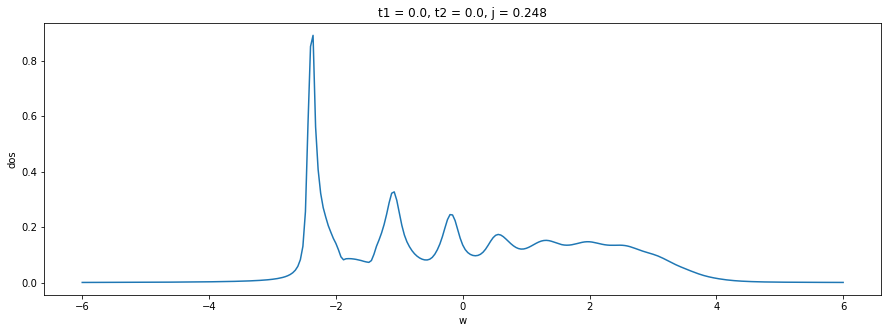

In [30]:
#Try 300 point sampling
dos = np.loadtxt(os.path.join('data', f'param_0.00_0.00_0.248', 'dos.dat'))

figure = plt.figure(figsize=(15, 5))
sampled_dos = dos[0:1201:4]
plt.plot(sampled_dos[:,0], sampled_dos[:,1])
plt.xlabel('w')
plt.ylabel('dos')
plt.title('t1 = 0.0, t2 = 0.0, j = 0.248')

In [5]:
#Load data
params = []
dos_data = []
for t1 in np.linspace(-0.5, 0.5, 51):
    for t2 in np.linspace(-0.5, 0.5, 51):
        for j in np.linspace(0.2, 1.0, 51):
            dos = np.loadtxt(os.path.join('data', f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'dos.dat'))
            dos_data.append(dos[0:1201:4, 1])
            params.append([t1, t2, j])
            
    print(f't1: {t1} completed')

params = np.array(params)
dos_data = np.array(dos_data)

t1: -0.5 completed
t1: -0.48 completed
t1: -0.46 completed
t1: -0.44 completed
t1: -0.42 completed
t1: -0.4 completed
t1: -0.38 completed
t1: -0.36 completed
t1: -0.33999999999999997 completed
t1: -0.32 completed
t1: -0.3 completed
t1: -0.28 completed
t1: -0.26 completed
t1: -0.24 completed
t1: -0.21999999999999997 completed
t1: -0.2 completed
t1: -0.18 completed
t1: -0.15999999999999998 completed
t1: -0.14 completed
t1: -0.12 completed
t1: -0.09999999999999998 completed
t1: -0.08000000000000002 completed
t1: -0.06 completed
t1: -0.03999999999999998 completed
t1: -0.020000000000000018 completed
t1: 0.0 completed
t1: 0.020000000000000018 completed
t1: 0.040000000000000036 completed
t1: 0.06000000000000005 completed
t1: 0.07999999999999996 completed
t1: 0.09999999999999998 completed
t1: 0.12 completed
t1: 0.14 completed
t1: 0.16000000000000003 completed
t1: 0.18000000000000005 completed
t1: 0.20000000000000007 completed
t1: 0.21999999999999997 completed
t1: 0.24 completed
t1: 0.26 comple

In [6]:
print(dos_data.shape)

(132651, 301)


In [7]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dos_data)
print(principal_components.shape)

(132651, 2)


In [16]:
print(params.shape)

(132651, 3)


In [24]:
def pca_color(ax, index, name):
    c = ax.scatter(principal_components[:,0], principal_components[:,1], c=params[:,index], s=1, cmap=plt.cm.get_cmap('RdPu'))
    
    plt.colorbar(c, ax = ax)
    ax.set_title(name)

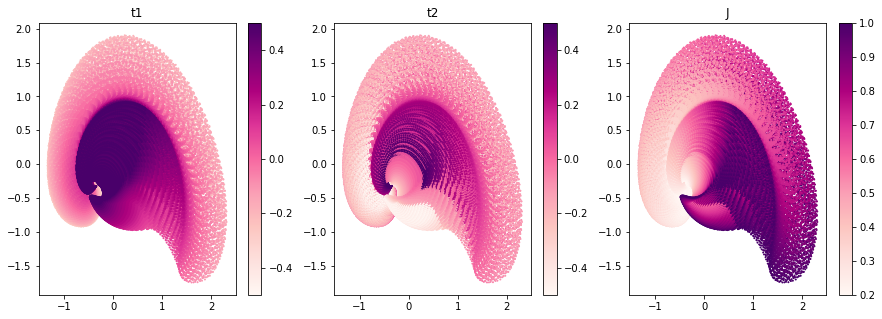

In [27]:
fig, ax = plt.subplots(1, 3, figsize =(15, 5))

pca_color(ax[0], 0, 't1')
pca_color(ax[1], 1, 't2')
pca_color(ax[2], 2, 'J')

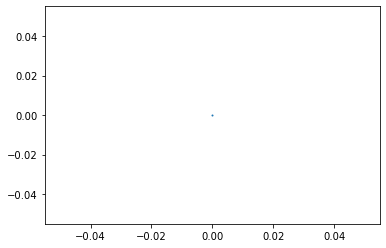

In [14]:
plt.scatter([0], [0], s=1)